In [16]:
# Name :- lUXSHAN S.
# Index No :- 190364C

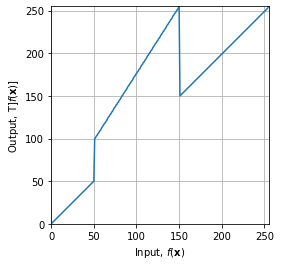

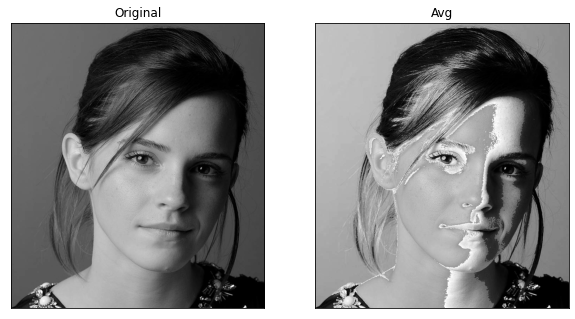

In [15]:
# Question 1

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c= np.array([(50, 50), (50, 100) , (150, 255), (150,150) , (255,255)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1-0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np. linspace(c[1,1], c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np. linspace(c[2,1], c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np. linspace(c[3,1], c[4,1], c[4,0]-c[3,0]).astype('uint8')
transform = np.concatenate((t1,t2,t3,t4), axis=0).astype('uint8') 
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig,ax = plt.subplots() 
ax.plot(transform)

ax.set_xlabel(r'Input, $f(\mathbf {x})$') 
ax.set_ylabel('Output, $\mathrm{T}]f(\mathbf {x})]$')
ax.set_xlim (0,255)
ax.set_ylim (0,255) 
ax.set_aspect('equal')
plt. savefig('transform.png')
plt.grid()
plt.show()
img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform) 
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10,10))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Avg')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()
